# Preliminary Modeling

## Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Reading in the Data

In [4]:
df = pd.read_csv('./data/posts.csv', index_col = 'Unnamed: 0')

In [5]:
df.head()

,subreddit,selftext,title
0,1,NaN,The Great Law of Peace is supposed to have bee...
1,1,I am 18 years old right now and I am consideri...,Is there a way I can work with language preser...
2,1,[removed],Why is genitive the second case?
3,1,I keep getting mixed results form just searchi...,what age can you no longer pick up a new accent
4,1,[removed],"Genitives and derived adjectives, Locatives an..."


In [6]:
df['selftext'] = df['selftext'].map(lambda x: '' if x == '[removed]' or x == 'NaN' or x == np.NaN or type(x) == float or x == 'nan' else x)

In [12]:
#dropping rows with empty descriptions
df.drop(df[df.selftext == ''].index, inplace=True)

In [8]:
df.head()

,subreddit,selftext,title
1,1,I am 18 years old right now and I am consideri...,Is there a way I can work with language preser...
3,1,I keep getting mixed results form just searchi...,what age can you no longer pick up a new accent
10,1,Has anyone tried using machine learning plus d...,Evolutionary (computational) generation of lan...
12,1,"some have observed, that while good old-fashio...",What are the basic problems of the CxG framework?
13,1,"""Simpler spelling may be more relevant than ev...",What is the present linguistic consensus on po...


In [9]:
df.shape

(1311, 3)

In [10]:
df.subreddit.value_counts(normalize=True)

0    0.501144
1    0.498856
Name: subreddit, dtype: float64

In [11]:
X = df.title + ' ' + df.selftext
y = df.subreddit

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify = y)

In [187]:
#setting up pipelines
pipe_log = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('log', LogisticRegression())
])

pipe_mnb = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('mnb', MultinomialNB())
])

pipe_knn = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('knn', KNeighborsClassifier())
])

pipe_rfc = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('rfc', RandomForestClassifier())
])

log_par = {
    'tvec__max_features': [2_000, 3_000, 4_000, 5_000, 6_000],
    'tvec__binary': [True, False],
    'tvec__stop_words': ['english'],
    'tvec__ngram_range': [(1,1), (1,2)],
    'log__C': [1, 0.1, 0.01, 0.001],
    'log__solver': ['liblinear', 'lbfgs']
}

mnb_par = {
    'tvec__max_features': [2_000, 3_000, 4_000, 5_000, 6_000],
    'tvec__binary': [True, False],
    'tvec__stop_words': ['english'],
    'tvec__ngram_range': [(1,1), (1,2)],
}

knn_par = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2],
    'tvec__max_features': [2_000, 3_000, 4_000, 5_000, 6_000],
    'tvec__binary': [True, False],
    'tvec__stop_words': ['english'],
    'tvec__ngram_range': [(1,1), (1,2)]
}
    
rfc_par = {
    'rfc__n_estimators': [50, 100, 150, 200],
    'rfc__max_depth': [None, 1, 2, 3, 4, 5],
    'tvec__max_features': [2_000, 3_000, 4_000, 5_000, 6_000],
    'tvec__binary': [True, False],
    'tvec__stop_words': ['english'],
    'tvec__ngram_range': [(1,1), (1,2)],
}

In [166]:
gsl = GridSearchCV(pipe_log, param_grid = log_par, n_jobs = -1, cv = 3)

In [167]:
gsl.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('log', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'log__C': [1, 0.1, 0.01, 0.001],
                         'log__solver': ['liblinear', 'lbfgs'],
                         'tvec__binary': [True, False],
                         'tvec__max_features': [2000, 3000, 4000, 5000, 6000],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': [None, 'english']})

In [139]:
gsm = GridSearchCV(pipe_mnb, mnb_par, n_jobs = -1, cv = 3)

In [140]:
gsm.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('mnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'tvec__binary': [True, False],
                         'tvec__max_features': [2000, 3000, 4000, 5000, 6000],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': [None, 'english']})

In [184]:
gsk = GridSearchCV(pipe_knn, param_grid = knn_par, n_jobs = -1, cv = 3)

In [185]:
gsk.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [3, 5, 7, 9], 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance'],
                         'tvec__binary': [True, False],
                         'tvec__max_features': [2000, 3000, 4000, 5000, 6000],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': [None, 'english']})

In [188]:
gsr = GridSearchCV(pipe_rfc, param_grid = rfc_par, n_jobs = -1, cv = 3)

In [189]:
gsr.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rfc__max_depth': [None, 1, 2, 3, 4, 5],
                         'rfc__n_estimators': [50, 100, 150, 200],
                         'tvec__binary': [True, False],
                         'tvec__max_features': [2000, 3000, 4000, 5000, 6000],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': [None, 'english']})

In [168]:
gsl.score(X_train, y_train), gsl.score(X_test, y_test)

(0.9755849440488301, 0.9207317073170732)

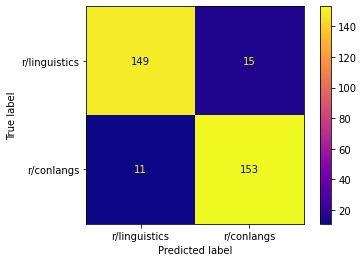

In [195]:
plot_confusion_matrix(gsl, X_test, y_test, display_labels=['r/linguistics', 'r/conlangs'], cmap = 'plasma');

In [164]:
gsm.best_estimator_.score(X_train, y_train), gsm.best_estimator_.score(X_test, y_test)

(0.9572736520854527, 0.8658536585365854)

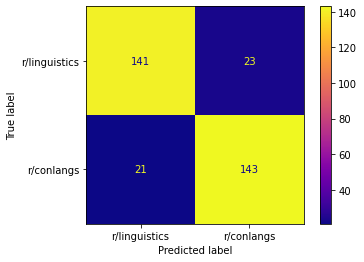

In [196]:
plot_confusion_matrix(gsm, X_test, y_test, display_labels=['r/linguistics', 'r/conlangs'], cmap = 'plasma');

In [186]:
gsk.score(X_train, y_train), gsk.score(X_test, y_test)

(0.9989827060020345, 0.8323170731707317)

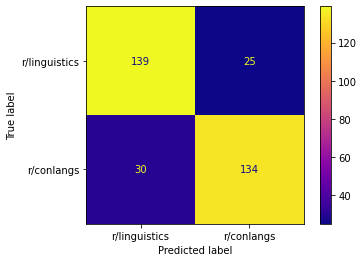

In [197]:
plot_confusion_matrix(gsk, X_test, y_test, display_labels=['r/linguistics', 'r/conlangs'], cmap = 'plasma');

In [190]:
gsr.score(X_train, y_train), gsr.score(X_test, y_test)

(0.9989827060020345, 0.9115853658536586)

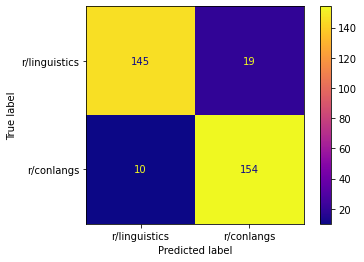

In [198]:
plot_confusion_matrix(gsr, X_test, y_test, display_labels=['r/linguistics', 'r/conlangs'], cmap = 'plasma');